In [28]:
from scipy.io import loadmat
import numpy as np
from scipy.io.wavfile import write
import matplotlib.pyplot as plt
import matplotlib
import IPython
from IPython.display import Audio
import math 
from numpy.fft import fft, ifft
from numpy.linalg import inv
#import sounddevice as sd
import time as time


%matplotlib inline
import matplotlib.pyplot as plt


In [3]:
sounds = loadmat('sounds.mat')['sounds']

test = loadmat('icaTest.mat')
A_test = test['A']
U_test = test['U']

print(np.shape(test['A']))
print(np.shape(test['U']))

(3, 3)
(3, 40)


In [25]:
#sounds  = np.asarray(sounds)



# ommit rewind sound
sounds  = np.asarray(sounds)
print(np.shape(sounds))

(5, 44000)


In [5]:
# Generate random matrices
#condition:
#mixed_signals >= n_source signals because the number of mixed signals cannot be less than the number of course signlas






def gradw_init(sounds, n_source_signals,mytime, mixed_signals, eta): 
    
    print(np.shape(U))

    #randomly select weights
    print("Shape of W is ")
    print(np.shape(w_init))
    print("w_init_start")
    print(w_init)

    print("shape of X")
    print(np.shape(X))

    Y = np.matmul(w_init, X)
    print(np.shape(Y))

    Z = np.zeros((n_source_signals, mytime))


    for i in range(n_source_signals):
        for j in range(mytime):
           Z[i,j] = 1/(1+math.exp(-(Y[i,j])))   

    print("the shape of Z is ")
    print(np.shape(Z))
    print(Z) 
    dynamic_identity_matrix = np.identity(n_source_signals)

    one_minus_2z_matrix = np.zeros((n_source_signals, mytime))


    for i in range(n_source_signals):
        for j in range(mytime):
            one_minus_2z_matrix[i,j] = 1-2*Z[i,j] 

    print("shape of one_minus_2z_matrix ")
    print(np.shape(one_minus_2z_matrix))



    intermed_result_one = np.matmul(one_minus_2z_matrix, Y.T)

    intermed_result_two = np.matmul((dynamic_identity_matrix + intermed_result_one),w_init) 

    grad_w = eta* intermed_result_two

    print("gradw")
    print(np.shape(grad_w))


    print("intermed ")
    print(np.shape(intermed_result_one))

    w_new = w_init + grad_w
    print("w _init new")
    print(w_new)
    return w_new
    

    
    
def grad_update(previous_weights):
   
    Y = np.matmul(previous_weights, X)
    #print("shape of Y is")
    #print(np.shape(Y))

    Z = np.zeros((n_source_signals, mytime))
    #print("Z shape is")
    #print(np.shape(Z))

    for i in range(n_source_signals):
        for j in range(mytime):
           Z[i,j] = 1/(1+math.exp(-(Y[i,j])))   

    
    x,y = np.shape(previous_weights)
    
    one_minus_2z_matrix = np.zeros((n_source_signals, mytime))
    dynamic_identity_matrix = np.identity(x)
    
    intermed_result_one = np.matmul(one_minus_2z_matrix, Y.T)
    intermed_result_two = np.matmul((dynamic_identity_matrix + intermed_result_one),previous_weights) 

    grad_w = eta* intermed_result_two

    #print("gradw")
    #print(np.shape(grad_w))


    #print("intermed ")
    #print(np.shape(intermed_result_one))

    w_new = w_init + grad_w
    #print("w _init new")
   # print(w_new)
    return w_new
    



In [26]:
%%time

eta = 0.01
n_source_signals = 5
mytime = 44000
mixed_signals = 5
iterations = 10000

a_weights = np.random.rand(mixed_signals, n_source_signals)

U = sounds[0:n_source_signals, 0:mytime ]
print(np.shape(U))

#a_weights = np.random.rand(mixed_signals, n_source_signals)
w_init = np.random.uniform( low = 0, high = 0.01, size =(n_source_signals, mixed_signals))
X = np.matmul(a_weights, U)




grad_init = gradw_init(sounds, n_source_signals,mytime, mixed_signals, eta)



##iterate through different iteration numbers, in increments of 5 iterations. 


#containers for holding elpased time per cycle number of iterations
x_iterations = []
y_time = []

start = time.time() 
for i in range(iterations ):
    
    if (i<=iterations +1):
        

        grad_new = grad_update(grad_init)
        grad_next = grad_update(grad_new)
        i+= 1
        print( "iteration: " + str(i-1))
        #print(grad_next)
        #record time elapsed per each iteration value, for later plotting
   
    end = time.time()
    end_time = ()
    x_iterations.append(i-1)
    time_elapsed = (end - start)
    time_elapsed = round(time_elapsed, 5)
    y_time.append(time_elapsed)
    print("Time:" + str(time_elapsed) + ' seconds') 




(5, 44000)
(5, 44000)
Shape of W is 
(5, 5)
w_init_start
[[0.00487227 0.00326336 0.00050558 0.00707985 0.00629683]
 [0.0034263  0.00920899 0.00147742 0.00141629 0.00877442]
 [0.0024505  0.0026475  0.00405955 0.00376802 0.00651012]
 [0.00966819 0.00817163 0.00063569 0.00297347 0.00514331]
 [0.00098737 0.00082317 0.00378005 0.00063148 0.00160839]]
shape of X
(5, 44000)
(5, 44000)
the shape of Z is 
(5, 44000)
[[0.49989489 0.4998872  0.49993532 ... 0.50017884 0.50013184 0.49995724]
 [0.49986377 0.4998505  0.49992163 ... 0.50023204 0.50017422 0.4999415 ]
 [0.49987387 0.49985296 0.49992074 ... 0.50020622 0.50015648 0.49994644]
 [0.49989655 0.4998933  0.49994198 ... 0.50018247 0.50013357 0.49995728]
 [0.49994206 0.49992823 0.49996264 ... 0.50009277 0.50007093 0.4999754 ]]
shape of one_minus_2z_matrix 
(5, 44000)
gradw
(5, 5)
intermed 
(5, 5)
w _init new
[[0.00485547 0.00321982 0.00048806 0.00710407 0.006275  ]
 [0.00338433 0.00921204 0.00146601 0.00137677 0.00876355]
 [0.00241847 0.00260813 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



iteration: 4049
Time:1179.38618 seconds
iteration: 4050
Time:1179.67646 seconds
iteration: 4051
Time:1179.9665 seconds
iteration: 4052
Time:1180.25778 seconds
iteration: 4053
Time:1180.54291 seconds
iteration: 4054
Time:1180.82691 seconds
iteration: 4055
Time:1181.10709 seconds
iteration: 4056
Time:1181.39993 seconds
iteration: 4057
Time:1181.68605 seconds
iteration: 4058
Time:1181.97107 seconds
iteration: 4059
Time:1182.27588 seconds
iteration: 4060
Time:1182.57506 seconds
iteration: 4061
Time:1182.86256 seconds
iteration: 4062
Time:1183.15029 seconds
iteration: 4063
Time:1183.44721 seconds
iteration: 4064
Time:1183.73919 seconds
iteration: 4065
Time:1184.04904 seconds
iteration: 4066
Time:1184.35466 seconds
iteration: 4067
Time:1184.63791 seconds
iteration: 4068
Time:1184.91976 seconds
iteration: 4069
Time:1185.1977 seconds
iteration: 4070
Time:1185.48322 seconds
iteration: 4071
Time:1185.77798 seconds
iteration: 4072
Time:1186.08102 seconds
iteration: 4073
Time:1186.38196 seconds
it

In [14]:
print(grad_next)
print(np.shape(grad_next))
print(y_time)

[[0.00435075 0.00978948 0.00025387 0.00103196]
 [0.00049481 0.00793482 0.00230512 0.00398072]
 [0.0073975  0.00089276 0.00412567 0.00307458]
 [0.00228626 0.00647676 0.00930776 0.01004709]]
(4, 4)
[0.22906, 0.22946, 0.22371, 0.44613, 0.41086, 0.41984, 0.41668, 0.42988, 0.2309, 0.22594, 0.28384, 0.42297, 0.45552, 0.40862, 0.40323, 0.40911, 0.50245, 0.51491, 0.44626, 0.46474]


In [ ]:
sound_matrix = np.matmul(grad_next,sounds[0:4, :])
print(np.shape(sound_matrix))

In [ ]:
##obtained using TACC machine, ~3 hrs

#Using only 4400 ms, 100000 iterations, ~3 hrs, computation time
grad_next =np.array([[13.02136035, -7.6164252,  -2.82834422,  2.06369931],
[-6.51265598 , 5.19997596 , 1.07005952, -1.65562518],
[-5.81916133 , 3.52857407 , 1.07264337 , 0.12980029],
[-0.39150559 ,-0.85093311 , 1.40374636 , 0.10206021]])
    
 

#Using full clip(44000 ms), 100000 iterations,  ~10 hours computation time

#grad_next = np.array([[-5.07912502e+00,  8.98060919e-01,  8.19605654e+00,  8.66326498e+00,
#  -7.76413022e+00],
# [ 3.84924709e+00,  2.42817466e-01, -3.15048606e+00, -1.97667078e+00,
 #  9.64245244e-03],
# [ 7.26738637e+00 , 2.54436869e-01, -1.29200312e+01, -1.52624957e+01,
#   1.29289554e+01],
# [-2.61734588e+00, -7.31362749e-01,  4.08524504e+00,  1.60339033e+00,
#  -2.83482447e-01],
# [-3.58663240e+00,  5.18839892e-02,  4.65021663e+00,  7.27517126e+00,
#  -4.49540807e+00]])


# Omitting rewind sound(row 0), full clip, 10000 iterations, 
# Omitting rewind sound(row 0), full clip, 10000 iterations, drill sound dominating 
grad_next = np.array([[ 0.88590911,  1.43401302, -0.39872688, -1.73149922],
 [ 0.13755381,  3.59189602, -2.38011818, -1.48655601],
 [-1.60357669,  1.19800977,  0.5333129,  -0.10265903],
 [ 1.05174644, -7.71781405,  3.72607693,  5.07750911]])


In [ ]:
# This is the one that is dominating
fs = 44000
sd.play(sound_matrix[0,:],fs)

In [ ]:

sd.play(sounds[0,:], fs)


In [ ]:
sd.play(sounds[1,:], fs)


In [ ]:
sd.play(sounds[2,:], fs)


In [ ]:
sd.play(sounds[3,:], fs)

In [ ]:
sd.play(sounds[4,:], fs)

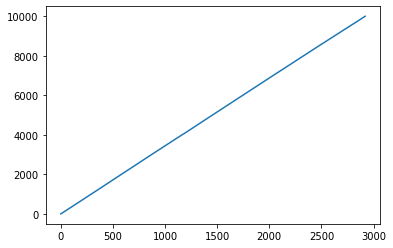

In [30]:
#Using TACC machine times rather than projected Macbook CPU time
matplotlib.pyplot.plot(y_time, x_iterations)
